In [26]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [40]:
## Define State
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [41]:
def bmi(state: BMIState) -> BMIState:
    """
    A helpful function to calculate BMI
    """
    weight = state['weight_kg']
    height = state['height_m']
    state['bmi'] = round((weight / (height**2)), 2)
    return state

def label_bmi(state: BMIState) -> BMIState:
    """
    This is a function to Label category based on bmi
    """
    bmi = state['bmi']
    if bmi < 18:
        state['category'] = 'underfit'
    elif bmi >18 and bmi<24:
        state['category'] = 'fit'
    else:
        state['category'] = 'overfit'
    return state

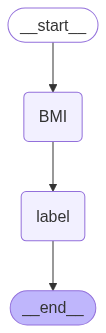

In [42]:
builder = StateGraph(BMIState)

## Adding Node
builder.add_node("BMI", bmi)
builder.add_node('label', label_bmi)

## Adding Edges
builder.add_edge(START, "BMI")
builder.add_edge('BMI', 'label')
builder.add_edge("label", END)

## Complie
graph = builder.compile()

from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [45]:
result = graph.invoke({"weight_kg": 70.00, 'height_m': 1.75})

for k,v in result.items():
    print(f"{k}     ->      {v}")

weight_kg     ->      70.0
height_m     ->      1.75
bmi     ->      22.86
category     ->      fit


In [46]:
result = graph.invoke({"weight_kg": 90.00, 'height_m': 1.75})

for k,v in result.items():
    print(f"{k}     ->      {v}")

weight_kg     ->      90.0
height_m     ->      1.75
bmi     ->      29.39
category     ->      overfit
